In [1]:
# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATASETS LOADING

In [2]:
# Fetch data from the Rick and Morty API
url = "https://rickandmortyapi.com/api/character"

response = requests.get(url)
data = response.json()

# Convert data to DataFrame
cha = pd.DataFrame(data['results'])

# Explore the structure of the data
cha.head()

,id,name,status,species,type,gender,origin,location,image,episode,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,2017-11-04T18:48:46.250Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,2017-11-04T18:50:21.651Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,2017-11-04T19:09:56.428Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,2017-11-04T19:22:43.665Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,2017-11-04T19:26:56.301Z


In [3]:
# Fetch data from the Rick and Morty API
url = "https://rickandmortyapi.com/api/location"

response = requests.get(url)
data = response.json()

# Convert data to DataFrame
loc = pd.DataFrame(data['results'])

# Explore the structure of the data
loc.head()

,id,name,type,dimension,residents,url,created
0,1,Earth (C-137),Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,2017-11-10T12:42:04.162Z
1,2,Abadango,Cluster,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,2017-11-10T13:06:38.182Z
2,3,Citadel of Ricks,Space station,unknown,"[https://rickandmortyapi.com/api/character/8, ...",https://rickandmortyapi.com/api/location/3,2017-11-10T13:08:13.191Z
3,4,Worldender's lair,Planet,unknown,"[https://rickandmortyapi.com/api/character/10,...",https://rickandmortyapi.com/api/location/4,2017-11-10T13:08:20.569Z
4,5,Anatomy Park,Microverse,Dimension C-137,"[https://rickandmortyapi.com/api/character/12,...",https://rickandmortyapi.com/api/location/5,2017-11-10T13:08:46.060Z


In [4]:
# Fetch data from the Rick and Morty API
url = "https://rickandmortyapi.com/api/episode"

response = requests.get(url)
data = response.json()

# Convert data to DataFrame
epi = pd.DataFrame(data['results'])

# Explore the structure of the data
epi.head()

,id,name,air_date,episode,characters,url,created
0,1,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1,2017-11-10T12:56:33.798Z
1,2,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2,2017-11-10T12:56:33.916Z
2,3,Anatomy Park,"December 16, 2013",S01E03,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/3,2017-11-10T12:56:34.022Z
3,4,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/4,2017-11-10T12:56:34.129Z
4,5,Meeseeks and Destroy,"January 20, 2014",S01E05,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/5,2017-11-10T12:56:34.236Z


### DATA PREPROCESSING



##### Merging Datasets

- Merge all above datasets(cha, loc, epi) into one dataframe.(rm)


##### Data Cleaning

- removing inconsistencies in a column
- renaming column names and dropping redundant columns
- changing datatypes of columns(object to datetime)

##### MERGING THE ABOVE DATASETS

In [5]:
# Merge the first two datasets
merged_df = pd.merge(cha, loc, on='id', how='inner')

# Merge the result with the third dataset
rm = pd.merge(merged_df, epi, on='id', how='inner')


# Display the merged DataFrame
rm.head()

,id,name_x,status,species,type_x,gender,origin,location,image,episode_x,...,dimension,residents,url_y,created_y,name,air_date,episode_y,characters,url,created
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",...,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,2017-11-10T12:42:04.162Z,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1,2017-11-10T12:56:33.798Z
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}","{'name': 'Citadel of Ricks', 'url': 'https://r...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/1, ht...",...,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,2017-11-10T13:06:38.182Z,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2,2017-11-10T12:56:33.916Z
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",...,unknown,"[https://rickandmortyapi.com/api/character/8, ...",https://rickandmortyapi.com/api/location/3,2017-11-10T13:08:13.191Z,Anatomy Park,"December 16, 2013",S01E03,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/3,2017-11-10T12:56:34.022Z
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",...,unknown,"[https://rickandmortyapi.com/api/character/10,...",https://rickandmortyapi.com/api/location/4,2017-11-10T13:08:20.569Z,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/4,2017-11-10T12:56:34.129Z
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...","{'name': 'Earth (Replacement Dimension)', 'url...",https://rickandmortyapi.com/api/character/avat...,"[https://rickandmortyapi.com/api/episode/6, ht...",...,Dimension C-137,"[https://rickandmortyapi.com/api/character/12,...",https://rickandmortyapi.com/api/location/5,2017-11-10T13:08:46.060Z,Meeseeks and Destroy,"January 20, 2014",S01E05,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/5,2017-11-10T12:56:34.236Z


##### **Removing inconsistencies in a column**

Identifying and correcting or removing any discrepancies, errors, or irregularities present in the data within that column (Location). 

In [6]:
# Extract 'name' from the dictionary in the 'location' column
rm['location'] = rm['location'].apply(lambda x: x['name'])

print(rm)

    id                     name_x   status species  \
0    1               Rick Sanchez    Alive   Human   
1    2                Morty Smith    Alive   Human   
2    3               Summer Smith    Alive   Human   
3    4                 Beth Smith    Alive   Human   
4    5                Jerry Smith    Alive   Human   
5    6  Abadango Cluster Princess    Alive   Alien   
6    7           Abradolf Lincler  unknown   Human   
7    8           Adjudicator Rick     Dead   Human   
8    9            Agency Director     Dead   Human   
9   10                 Alan Rails     Dead   Human   
10  11            Albert Einstein     Dead   Human   
11  12                  Alexander     Dead   Human   
12  13               Alien Googah  unknown   Alien   
13  14                Alien Morty  unknown   Alien   
14  15                 Alien Rick  unknown   Alien   
15  16               Amish Cyborg     Dead   Alien   
16  17                      Annie    Alive   Human   
17  18              Antenna 

In [7]:
rm.location

0                  Citadel of Ricks
1                  Citadel of Ricks
2     Earth (Replacement Dimension)
3     Earth (Replacement Dimension)
4     Earth (Replacement Dimension)
5                          Abadango
6        Testicle Monster Dimension
7                  Citadel of Ricks
8     Earth (Replacement Dimension)
9                 Worldender's lair
10    Earth (Replacement Dimension)
11                     Anatomy Park
12    Earth (Replacement Dimension)
13                 Citadel of Ricks
14                 Citadel of Ricks
15    Earth (Replacement Dimension)
16                     Anatomy Park
17                 Citadel of Ricks
18                          unknown
19           Interdimensional Cable
Name: location, dtype: object

In [8]:
rm.columns

Index(['id', 'name_x', 'status', 'species', 'type_x', 'gender', 'origin',
       'location', 'image', 'episode_x', 'url_x', 'created_x', 'name_y',
       'type_y', 'dimension', 'residents', 'url_y', 'created_y', 'name',
       'air_date', 'episode_y', 'characters', 'url', 'created'],
      dtype='object')

##### **Dropping redundant columns and Renaming column names**

To help make analysis across the dataset, seamless and more focused on the relevant columns.

In [9]:
# Drop redundant column(Image)
rm.drop(columns=['image','created_x', 'created_y', 'created'], inplace=True)

rm.head()

,id,name_x,status,species,type_x,gender,origin,location,episode_x,url_x,name_y,type_y,dimension,residents,url_y,name,air_date,episode_y,characters,url
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...",Citadel of Ricks,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,Earth (C-137),Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}",Citadel of Ricks,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,Abadango,Cluster,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,Citadel of Ricks,Space station,unknown,"[https://rickandmortyapi.com/api/character/8, ...",https://rickandmortyapi.com/api/location/3,Anatomy Park,"December 16, 2013",S01E03,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/3
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,Worldender's lair,Planet,unknown,"[https://rickandmortyapi.com/api/character/10,...",https://rickandmortyapi.com/api/location/4,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/4
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,Anatomy Park,Microverse,Dimension C-137,"[https://rickandmortyapi.com/api/character/12,...",https://rickandmortyapi.com/api/location/5,Meeseeks and Destroy,"January 20, 2014",S01E05,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/5


### Renaming Columns

In [10]:
rm = rm.rename(columns={
    'name_x': 'character_name', 
    'url': 'episode_url', 
    'url_y': 'location_url', 
    'url_x': 'character_url', 
    'characters': 'episode_characters', 
    'episode_x': 'cha_episode_url', 
    'created': 'date_time_created',
    'dimension': 'location_dimension', 
    'name_y': 'exact_location', 
    'name': 'episode_name',
    'type_x': 'character_type',
    'type_y': 'location_type', 
    'episode_y': 'episode_code'
})

# Display the DataFrame with renamed columns
print(rm)

    id             character_name   status species  \
0    1               Rick Sanchez    Alive   Human   
1    2                Morty Smith    Alive   Human   
2    3               Summer Smith    Alive   Human   
3    4                 Beth Smith    Alive   Human   
4    5                Jerry Smith    Alive   Human   
5    6  Abadango Cluster Princess    Alive   Alien   
6    7           Abradolf Lincler  unknown   Human   
7    8           Adjudicator Rick     Dead   Human   
8    9            Agency Director     Dead   Human   
9   10                 Alan Rails     Dead   Human   
10  11            Albert Einstein     Dead   Human   
11  12                  Alexander     Dead   Human   
12  13               Alien Googah  unknown   Alien   
13  14                Alien Morty  unknown   Alien   
14  15                 Alien Rick  unknown   Alien   
15  16               Amish Cyborg     Dead   Alien   
16  17                      Annie    Alive   Human   
17  18              Antenna 

In [11]:
rm.head()

,id,character_name,status,species,character_type,gender,origin,location,cha_episode_url,character_url,exact_location,location_type,location_dimension,residents,location_url,episode_name,air_date,episode_code,episode_characters,episode_url
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...",Citadel of Ricks,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,Earth (C-137),Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,Pilot,"December 2, 2013",S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}",Citadel of Ricks,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,Abadango,Cluster,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,Lawnmower Dog,"December 9, 2013",S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,Citadel of Ricks,Space station,unknown,"[https://rickandmortyapi.com/api/character/8, ...",https://rickandmortyapi.com/api/location/3,Anatomy Park,"December 16, 2013",S01E03,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/3
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,Worldender's lair,Planet,unknown,"[https://rickandmortyapi.com/api/character/10,...",https://rickandmortyapi.com/api/location/4,M. Night Shaym-Aliens!,"January 13, 2014",S01E04,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/4
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,Anatomy Park,Microverse,Dimension C-137,"[https://rickandmortyapi.com/api/character/12,...",https://rickandmortyapi.com/api/location/5,Meeseeks and Destroy,"January 20, 2014",S01E05,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/5


In [12]:
# A brief overview of the dataframe
rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  20 non-null     int64 
 1   character_name      20 non-null     object
 2   status              20 non-null     object
 3   species             20 non-null     object
 4   character_type      20 non-null     object
 5   gender              20 non-null     object
 6   origin              20 non-null     object
 7   location            20 non-null     object
 8   cha_episode_url     20 non-null     object
 9   character_url       20 non-null     object
 10  exact_location      20 non-null     object
 11  location_type       20 non-null     object
 12  location_dimension  20 non-null     object
 13  residents           20 non-null     object
 14  location_url        20 non-null     object
 15  episode_name        20 non-null     object
 16  air_date            20 non-n

##### **Changing datatypes of columns(object to datetime)**

Converting values in the "air_date" column to datetime, helps to perform any date-based operations or analysis on that column. It allows us to easily filter, sort, and perform calculations based on dates. 
Such as filtering rows based on specific dates, extracting components like year or month, or calculating time differences between dates.

In [13]:
# rm being the DataFrame and "air_date" is the column containing dates
rm['air_date'] = pd.to_datetime(rm['air_date'], errors='coerce')

rm.air_date

0    2013-12-02
1    2013-12-09
2    2013-12-16
3    2014-01-13
4    2014-01-20
5    2014-01-27
6    2014-03-10
7    2014-03-17
8    2014-03-24
9    2014-04-07
10   2014-04-14
11   2015-07-26
12   2015-08-02
13   2015-08-09
14   2015-08-16
15   2015-08-23
16   2015-08-30
17   2015-09-13
18   2015-09-20
19   2015-09-27
Name: air_date, dtype: datetime64[ns]

In [14]:
# check for the change in datatypes, from the previous operation
rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  20 non-null     int64         
 1   character_name      20 non-null     object        
 2   status              20 non-null     object        
 3   species             20 non-null     object        
 4   character_type      20 non-null     object        
 5   gender              20 non-null     object        
 6   origin              20 non-null     object        
 7   location            20 non-null     object        
 8   cha_episode_url     20 non-null     object        
 9   character_url       20 non-null     object        
 10  exact_location      20 non-null     object        
 11  location_type       20 non-null     object        
 12  location_dimension  20 non-null     object        
 13  residents           20 non-null     object        
 

In [15]:
# looking at the results above, no columns with missing values but this confirms it.
# identify the missingn data points

rm.isnull().sum()

id                    0
character_name        0
status                0
species               0
character_type        0
gender                0
origin                0
location              0
cha_episode_url       0
character_url         0
exact_location        0
location_type         0
location_dimension    0
residents             0
location_url          0
episode_name          0
air_date              0
episode_code          0
episode_characters    0
episode_url           0
dtype: int64

#### Observation

no missing values in the datframe, rm as seen in the result, above.

In [16]:
rm.columns

Index(['id', 'character_name', 'status', 'species', 'character_type', 'gender',
       'origin', 'location', 'cha_episode_url', 'character_url',
       'exact_location', 'location_type', 'location_dimension', 'residents',
       'location_url', 'episode_name', 'air_date', 'episode_code',
       'episode_characters', 'episode_url'],
      dtype='object')

In [17]:
# An in-depth description of the dataframe
rm.describe()

,id,air_date
count,20.00000,20
mean,10.50000,2014-10-19 04:48:00
min,1.00000,2013-12-02 00:00:00
25%,5.75000,2014-01-25 06:00:00
50%,10.50000,2014-04-10 12:00:00
75%,15.25000,2015-08-17 18:00:00
max,20.00000,2015-09-27 00:00:00
std,5.91608,NaN


In [18]:
# Using T for transpose to see variables in a better format
rm.describe().T 

,count,mean,min,25%,50%,75%,max,std
id,20.0,10.5,1.0,5.75,10.5,15.25,20.0,5.91608
air_date,20,2014-10-19 04:48:00,2013-12-02 00:00:00,2014-01-25 06:00:00,2014-04-10 12:00:00,2015-08-17 18:00:00,2015-09-27 00:00:00,NaN


In [19]:
# checking dimensionality of dataframe

rm.shape

(20, 20)

In this above result, the DataFrame (rm) has 20 rows and 20 columns.

#### Feature Engineering: 

In [20]:
# Extract episode numbers from URLs for analysis
rm['episodes'] = rm['episode_url'].str.split('/').str[-1]

# Display the DataFrame
rm.head()

,id,character_name,status,species,character_type,gender,origin,location,cha_episode_url,character_url,...,location_type,location_dimension,residents,location_url,episode_name,air_date,episode_code,episode_characters,episode_url,episodes
0,1,Rick Sanchez,Alive,Human,,Male,"{'name': 'Earth (C-137)', 'url': 'https://rick...",Citadel of Ricks,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/1,...,Planet,Dimension C-137,"[https://rickandmortyapi.com/api/character/38,...",https://rickandmortyapi.com/api/location/1,Pilot,2013-12-02,S01E01,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/1,1
1,2,Morty Smith,Alive,Human,,Male,"{'name': 'unknown', 'url': ''}",Citadel of Ricks,"[https://rickandmortyapi.com/api/episode/1, ht...",https://rickandmortyapi.com/api/character/2,...,Cluster,unknown,[https://rickandmortyapi.com/api/character/6],https://rickandmortyapi.com/api/location/2,Lawnmower Dog,2013-12-09,S01E02,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/2,2
2,3,Summer Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/3,...,Space station,unknown,"[https://rickandmortyapi.com/api/character/8, ...",https://rickandmortyapi.com/api/location/3,Anatomy Park,2013-12-16,S01E03,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/3,3
3,4,Beth Smith,Alive,Human,,Female,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/4,...,Planet,unknown,"[https://rickandmortyapi.com/api/character/10,...",https://rickandmortyapi.com/api/location/4,M. Night Shaym-Aliens!,2014-01-13,S01E04,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/4,4
4,5,Jerry Smith,Alive,Human,,Male,"{'name': 'Earth (Replacement Dimension)', 'url...",Earth (Replacement Dimension),"[https://rickandmortyapi.com/api/episode/6, ht...",https://rickandmortyapi.com/api/character/5,...,Microverse,Dimension C-137,"[https://rickandmortyapi.com/api/character/12,...",https://rickandmortyapi.com/api/location/5,Meeseeks and Destroy,2014-01-20,S01E05,"[https://rickandmortyapi.com/api/character/1, ...",https://rickandmortyapi.com/api/episode/5,5


In [21]:
# Calculate the number of episodes each character appears in
rm['num_episodes'] = rm['cha_episode_url'].apply(len)

# Print the episode count for each character
for character_id, character_name, num_episodes in rm[['id', 'character_name', 'num_episodes']].values:
    print(f"Character: {character_name} (ID: {character_id}), Number of Episodes: {num_episodes}")

Character: Rick Sanchez (ID: 1), Number of Episodes: 51
Character: Morty Smith (ID: 2), Number of Episodes: 51
Character: Summer Smith (ID: 3), Number of Episodes: 42
Character: Beth Smith (ID: 4), Number of Episodes: 42
Character: Jerry Smith (ID: 5), Number of Episodes: 39
Character: Abadango Cluster Princess (ID: 6), Number of Episodes: 1
Character: Abradolf Lincler (ID: 7), Number of Episodes: 2
Character: Adjudicator Rick (ID: 8), Number of Episodes: 1
Character: Agency Director (ID: 9), Number of Episodes: 1
Character: Alan Rails (ID: 10), Number of Episodes: 1
Character: Albert Einstein (ID: 11), Number of Episodes: 1
Character: Alexander (ID: 12), Number of Episodes: 1
Character: Alien Googah (ID: 13), Number of Episodes: 1
Character: Alien Morty (ID: 14), Number of Episodes: 1
Character: Alien Rick (ID: 15), Number of Episodes: 1
Character: Amish Cyborg (ID: 16), Number of Episodes: 1
Character: Annie (ID: 17), Number of Episodes: 1
Character: Antenna Morty (ID: 18), Number of

### Exploratory Data Analysis

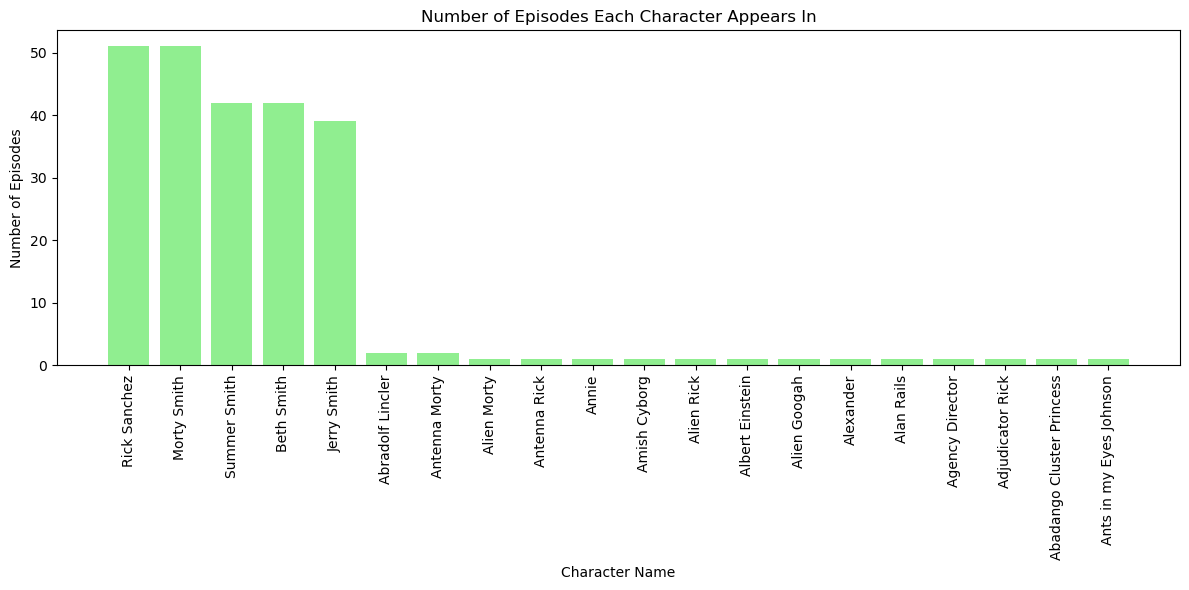

In [22]:
# Chart
# Calculate the number of episodes each character appears in
rm['num_episodes'] = rm['cha_episode_url'].apply(len)

# Sort the DataFrame by the number of episodes
rm_sorted = rm.sort_values(by='num_episodes', ascending=False)

# Plot the number of episodes for each character
plt.figure(figsize=(12, 6))
plt.bar(rm_sorted['character_name'], rm_sorted['num_episodes'], color='lightgreen')
plt.xticks(rotation=90)
plt.xlabel('Character Name')
plt.ylabel('Number of Episodes')
plt.title('Number of Episodes Each Character Appears In')
plt.tight_layout()
plt.show()

### Insights

- The total number of episodes is 51, as discovered from the resources provided.
- Rick Sanchez and Morty Smith appeared in all episodes, as main characters.

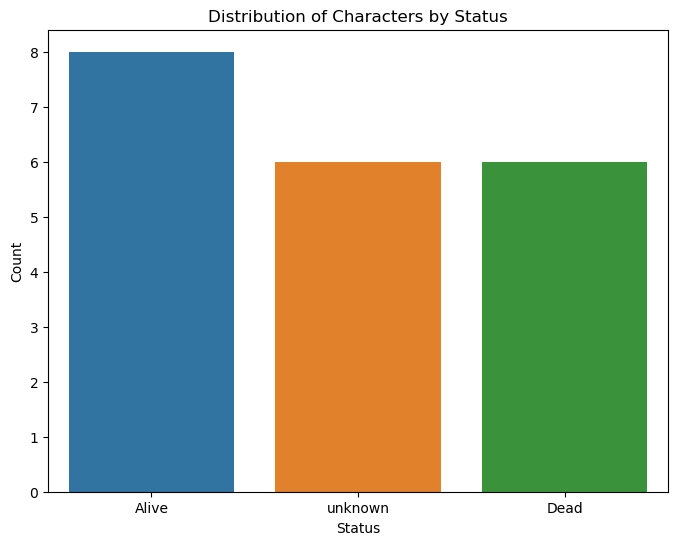

In [23]:
# Distribution of Characters by Status
plt.figure(figsize=(8, 6))
sns.countplot(data=rm, x='status')
plt.title('Distribution of Characters by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

#### Observation

The above Viz helps us visualize the distribution of characters by their status (e.g., alive, dead, unknown) and can deduce that a lot more characters are alive than those dead or unknown.

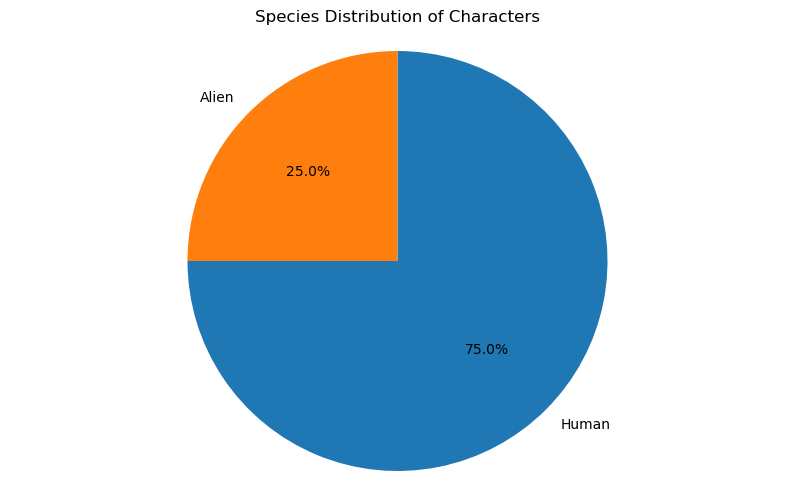

In [24]:
# Get the species distribution counts
species_counts = rm['species'].value_counts()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=180)
plt.title('Species Distribution of Characters')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

#### Observation

The above Viz helps us visualize and explore the distribution of characters by species. We can deduce that 75% of all characters featured are human and the other characters being the minority as 25%, are Aliens.

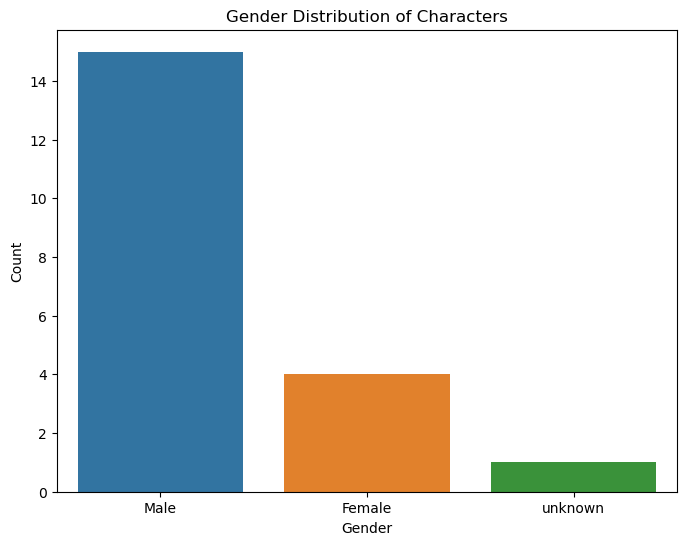

In [25]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=rm, x='gender')
plt.title('Gender Distribution of Characters')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Observation

The above Viz helps us to visualize and analyze the gender distribution of characters. We can observe some gender disparity in the roles/characters, as a lot more Male characters are featured, and female or unknown gender categories are less featured.

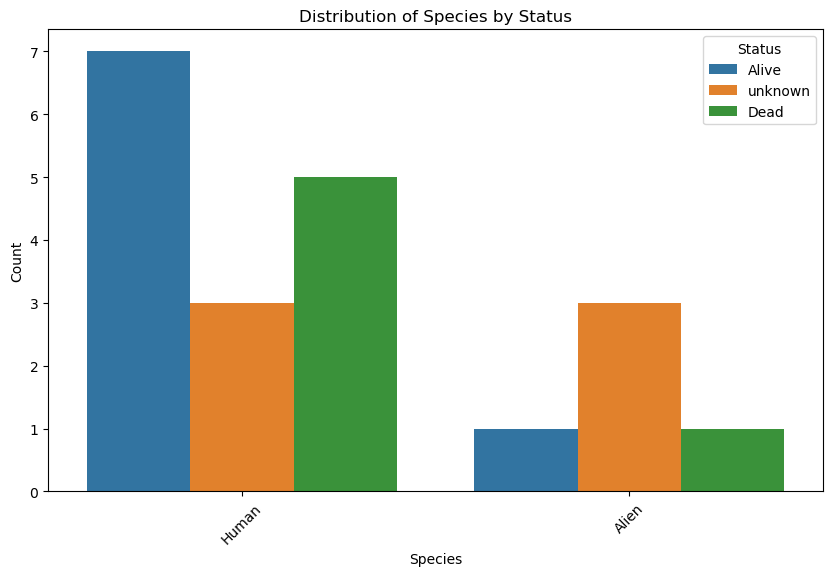

In [26]:
# Relationship between 'status' and 'species'
plt.figure(figsize=(10, 6))
sns.countplot(data=rm, x='species', hue='status')
plt.title('Distribution of Species by Status')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Status')
plt.show()

#### Insights

The above Viz helps us to visualize and analyze the status of characters, according to the types of species of the characters.

We can deduce the follingn

- The status of the Human species was mostly Alive, and the lowest status for humans, was unknown
- The status of Alien Species was mostly unknown.g;

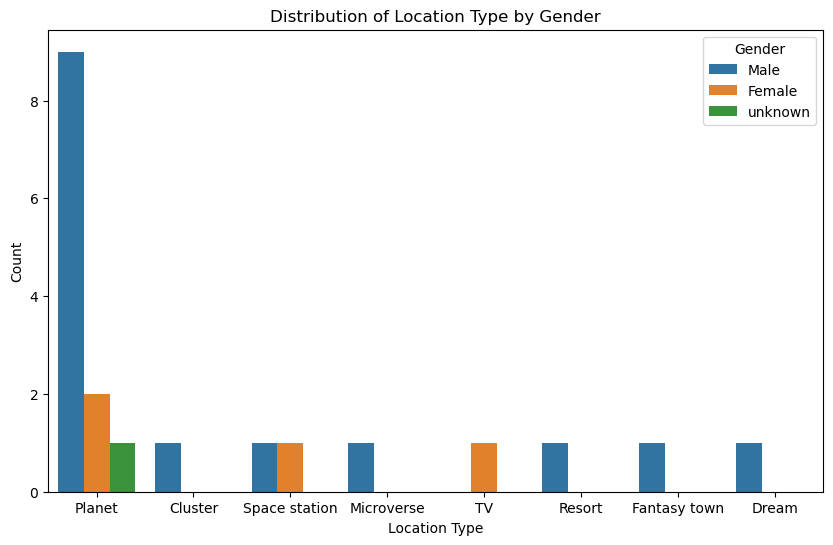

In [27]:
# Relationship between 'gender' and 'location_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=rm, x='location_type', hue='gender')
plt.title('Distribution of Location Type by Gender')
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

#### Insights

The above Viz helps us to visualize and analyze the gender distribution of characters according to various location types. 

We can deduce the following;

- The male characters featured most on the Planet location, and a lot more than the female or unknown characters
- Five(5) locations (Cluster, Microverse, Resort, Fantasy Town, and Dream) featured only male characters.
- The TV location had only female characters.
- The space station had only male and female characters.

  In Summary, the Male Characters featured more than other genders, across all locations.

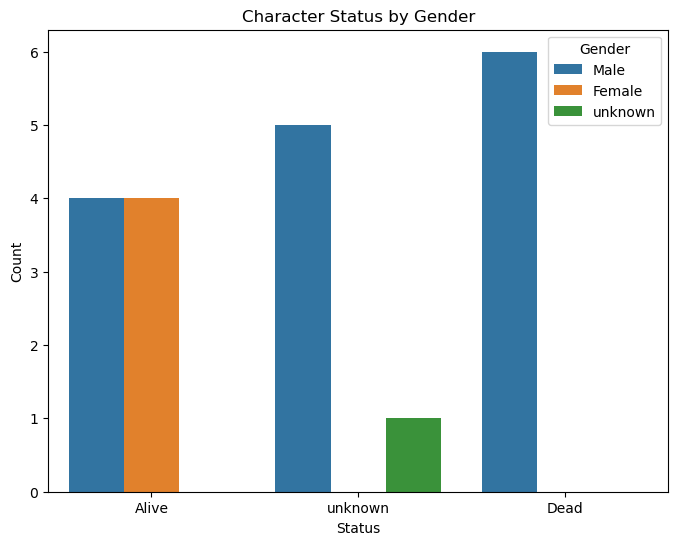

In [28]:
# Character Status by Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=rm, x='status', hue='gender')
plt.title('Character Status by Gender')
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

#### Deduction

- We can observe that the Male characters were mostly dead, according to status given.

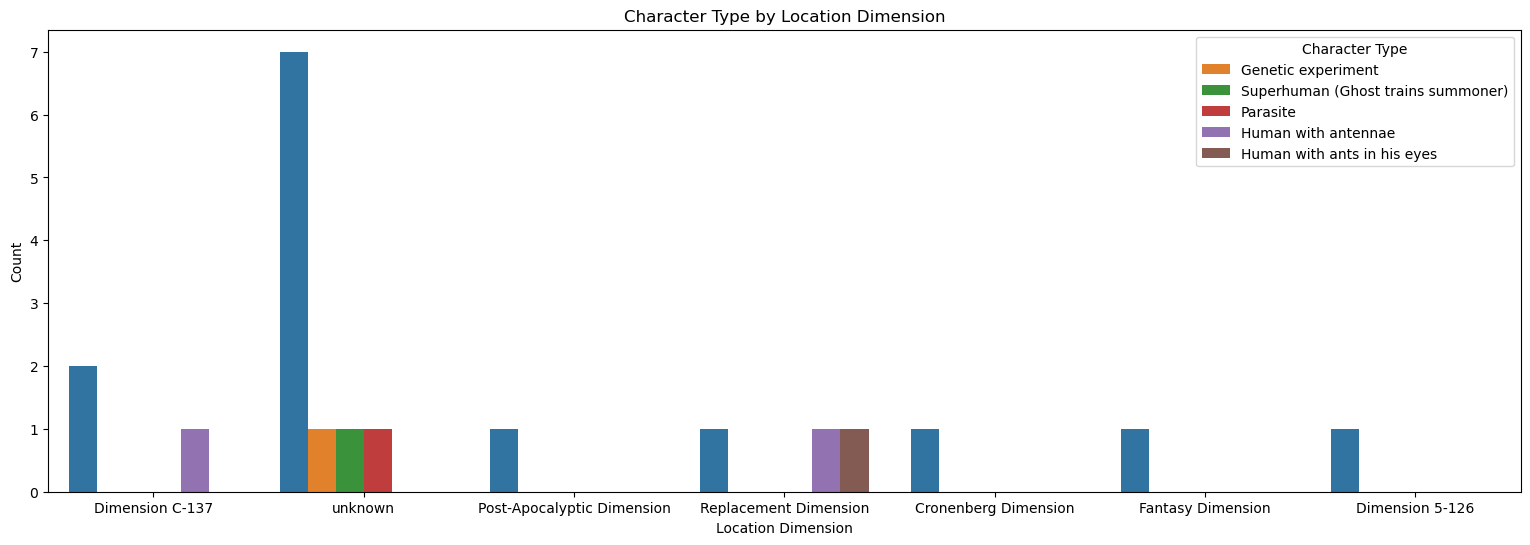

In [29]:
# Character Type by Location Dimension
plt.figure(figsize=(19, 6))
sns.countplot(data=rm, x='location_dimension', hue='character_type')
plt.title('Character Type by Location Dimension')
plt.xlabel('Location Dimension')
plt.ylabel('Count')
plt.legend(title='Character Type')
plt.show()

#### Deduction

- Just four (4) Location dimensions (Post-Apocalyptic, Cronenberg, Fantasy, Dimension 5-126) featured only 1 character type.

In [30]:
import ast

# Assuming 'column_name' is the name of the column containing strings representing lists
# Convert strings to lists
rm['character_name'] = rm['character_name'].apply(ast.literal_eval)

SyntaxError: invalid syntax (<unknown>, line 1)

In [ ]:
# Group the data by 'episode_name' and count the number of unique characters
episode_character_count = rm.groupby('cha_episode_url')['character_name'].nunique()

# Sort the groups in descending order based on character count
episode_character_count = episode_character_count.sort_values(ascending=False)

# Retrieve the episode(s) with the highest count of characters
episode_with_most_characters = episode_character_count.head(1)  # You can change the number to get more episodes if needed

print("Episode(s) with the most characters:")
print(episode_with_most_characters)

In [ ]:
rm.dtypes

### Correlation 

- to show relationship with columns

In [ ]:
# Convert categorical variables to numerical representations
rm['status'] = rm['status'].astype('category').cat.codes
rm['gender'] = rm['gender'].astype('category').cat.codes
rm['species'] = rm['species'].astype('category').cat.codes

# Compute correlation matrix
correlation = rm[['num_episodes', 'status', 'gender', 'species']].corr()
print(correlation)

Based on the correlation coefficients:

1. **Number of Episodes vs. Status**: There is a strong negative correlation (-0.62) between the number of episodes a character appears in and their status. This means that characters with higher episode counts are more likely to have a lower status.

2. **Number of Episodes vs. Gender**: There is a moderate negative correlation (-0.27) between the number of episodes and the gender of the character. This implies that the number of episodes a character appears in is slightly less for certain genders compared to others.

3. **Number of Episodes vs. Species**: There is a moderate positive correlation (0.33) between the number of episodes and the species of the character. This suggests that certain species tend to appear in more episodes than others.

4. **Status vs. Gender**: There is a moderate positive correlation (0.59) between the status of a character and their gender. This indicates that certain genders are more likely to have higher status roles.

These deductions provide insights into the relationships between different features in the dataset.

**Summary Write-Up: Character Analysis Using Rick and Morty API**

**Objective:**
RM Fandom, a movie analytics non-profit, tasked us with analyzing data from the Rick and Morty API to understand the relationship between different features and the number of episodes a character appears in.

**Approach:**
1. **Data Collection:** We obtained data from the characters endpoint of the Rick and Morty API.
2. **Data Exploration:** Explored the dataset to understand its structure, features, and potential insights it could offer.
3. **Feature Engineering:** Generated new features as required to enhance our analysis.
4. **Data Analysis:** Conducted in-depth analysis to determine relationships between features and the number of episodes a character appears in.
5. **Visualization:** Created appropriate plots to visualize relationships and patterns in the data.
6. **Interpretation:** Provided insightful interpretations and explanations of the findings in the notebook using Markdown.


**Deliverables**

- Correlation matrix was utilized, to show the relationship between columns whether positive or negative

- Generation of new features, as necessary.
  
- In-depth analysis with appropriate plots.
  
- Clear explanations and interpretations using Markdown, during analysis

- Visualizations: Included informative visualizations to aid in understanding the data.
  
- Inference: Ensured that the notebook is easily understandable, allowing any reader to follow the steps taken and the reasoning behind them.

**Conclusion:**
Through thorough analysis of the Rick and Morty API data, we gained insights into the factors influencing the number of episodes a character appears in. Our comprehensive approach and clear documentation ensure that our findings are accessible and useful for RM Fandom's movie analytics efforts.ytics efforts.